In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    "Thor eating pizza, Loki is eating pizza, Ironman ate pizza already",
    "Apple is announcing new iphone tomorrow",
    "Tesla is announcing new model-3 tomorrow",
    "Google is announcing new pixel-6 tomorrow",
    "Microsoft is announcing new surface tomorrow",
    "Amazon is announcing new eco-dot tomorrow",
    "I am eating biryani and you are eating grapes"
]

In [2]:
v=TfidfVectorizer()
v.fit(corpus)
transform_output = v.transform(corpus)
print(v.vocabulary_)

{'thor': 25, 'eating': 10, 'pizza': 22, 'loki': 17, 'is': 16, 'ironman': 15, 'ate': 7, 'already': 0, 'apple': 5, 'announcing': 4, 'new': 20, 'iphone': 14, 'tomorrow': 26, 'tesla': 24, 'model': 19, 'google': 12, 'pixel': 21, 'microsoft': 18, 'surface': 23, 'amazon': 2, 'eco': 11, 'dot': 9, 'am': 1, 'biryani': 8, 'and': 3, 'you': 27, 'are': 6, 'grapes': 13}


In [3]:
all_feature_names = v.get_feature_names_out()

for word in all_feature_names:
    index = v.vocabulary_.get(word)
    
    idf_score = v.idf_[index]
    
    print(f"{word}:{idf_score}")

already:2.386294361119891
am:2.386294361119891
amazon:2.386294361119891
and:2.386294361119891
announcing:1.2876820724517808
apple:2.386294361119891
are:2.386294361119891
ate:2.386294361119891
biryani:2.386294361119891
dot:2.386294361119891
eating:1.9808292530117262
eco:2.386294361119891
google:2.386294361119891
grapes:2.386294361119891
iphone:2.386294361119891
ironman:2.386294361119891
is:1.1335313926245225
loki:2.386294361119891
microsoft:2.386294361119891
model:2.386294361119891
new:1.2876820724517808
pixel:2.386294361119891
pizza:2.386294361119891
surface:2.386294361119891
tesla:2.386294361119891
thor:2.386294361119891
tomorrow:1.2876820724517808
you:2.386294361119891


In [6]:
import pandas as pd

df = pd.read_csv("Ecommerce_data.csv")
print(df.shape)
df.head()

(24000, 2)


,Text,label
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household
1,"Contrast living Wooden Decorative Box,Painted ...",Household
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories


In [7]:
df['label'].value_counts()

Household                 6000
Electronics               6000
Clothing & Accessories    6000
Books                     6000
Name: label, dtype: int64

In [8]:
df['label_num'] = df['label'].map({
    'Household' : 0,
    'Books': 1,
    'Electronics': 2,
    'Clothing & Accessories' : 3
})

df.head()

,Text,label,label_num
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,2
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,3
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,3


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.Text,
    df.label_num,
    test_size=0.2,
    random_state=2022,
    stratify=df.label_num
)

In [10]:
print('Shape of X_train: ',X_train.shape)
print('Shape of X_test: ',X_test.shape)

Shape of X_train:  (19200,)
Shape of X_test:  (4800,)


In [11]:
X_train.head()

15820    IRIS Furniture Children Deluxe Spiderman Toddl...
23224    Godox CB-09 Hard Carrying Storage Suitcase Car...
4638     Ugreen All in 1 USB 3.0 Card Reader USB Memory...
15245    Spread Spain Metallic Gold Bar Trolley/Kitchen...
5378     Chromozome Men's Calf Socks (Pack of 3) (SX-3 ...
Name: Text, dtype: object

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf=Pipeline([
    ('vectorizer_tfidf',TfidfVectorizer()),
    ('KNN', KNeighborsClassifier())
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1200
           1       0.97      0.95      0.96      1200
           2       0.97      0.97      0.97      1200
           3       0.97      0.98      0.97      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



In [13]:
from sklearn.naive_bayes import MultinomialNB

clf=Pipeline([
    ('vectorizer_tfidf',TfidfVectorizer()),
    ('Naive Bayes', MultinomialNB())
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1200
           1       0.98      0.92      0.95      1200
           2       0.97      0.97      0.97      1200
           3       0.97      0.99      0.98      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



In [14]:
from sklearn.ensemble import RandomForestClassifier

clf=Pipeline([
    ('vectorizer_tfidf',TfidfVectorizer()),
    ('Random Forest', RandomForestClassifier())
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1200
           1       0.98      0.98      0.98      1200
           2       0.98      0.97      0.97      1200
           3       0.98      0.99      0.98      1200

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800



In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm')

def preprocess(text):
    doc=nlp(text)
    filtered_tokens=[]
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
        
    return " ".join(filtered_tokens)

In [16]:
df['preprocessed_text']=df['Text'].apply(preprocess)
df.head()

,Text,label,label_num,preprocessed_text
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0,Urban Ladder Eisner low Study Office Computer ...
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0,contrast live Wooden Decorative Box Painted Bo...
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,2,IO Crest SY PCI40010 PCI raid Host Controller ...
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,3,ISAKAA Baby Socks bear 8 Years- Pack 4 6 8 12 ...
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,3,Indira Designer Women Art Mysore Silk Saree Bl...


In [18]:
df.Text[0]

'Urban Ladder Eisner Low Back Study-Office Computer Chair(Black) A study in simple. The Eisner study chair has a firm foam cushion, which makes long hours at your desk comfortable. The flexible meshed back is designed for air-circulation and support when you lean back. The curved arms provide ergonomic forearm support. Adjust the height using the gas lift to find that comfortable position and the nylon castors make it easy to move around your space. Chrome legs refer to the images for dimension details any assembly required will be done by the UL team at the time of delivery indoor use only.'

In [19]:
df.preprocessed_text[0]

'Urban Ladder Eisner low Study Office Computer Chair(Black study simple Eisner study chair firm foam cushion make long hour desk comfortable flexible mesh design air circulation support lean curved arm provide ergonomic forearm support adjust height gas lift find comfortable position nylon castor easy space chrome leg refer image dimension detail assembly require UL team time delivery indoor use'

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    df.preprocessed_text,
    df.label_num,
    test_size=0.2,
    random_state=2022,
    stratify=df.label_num
)

In [21]:
clf=Pipeline([
    ('vectorizer_tfidf',TfidfVectorizer()),
    ('Random Forest', RandomForestClassifier())
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1200
           1       0.98      0.98      0.98      1200
           2       0.98      0.97      0.98      1200
           3       0.98      0.99      0.99      1200

    accuracy                           0.98      4800
   macro avg       0.98      0.98      0.98      4800
weighted avg       0.98      0.98      0.98      4800



In [22]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, y_pred)
cm

array([[1160,    9,   16,   15],
       [  20, 1174,    3,    3],
       [  23,    8, 1165,    4],
       [   6,    3,    1, 1190]], dtype=int64)

Text(69.0, 0.5, 'Truth')

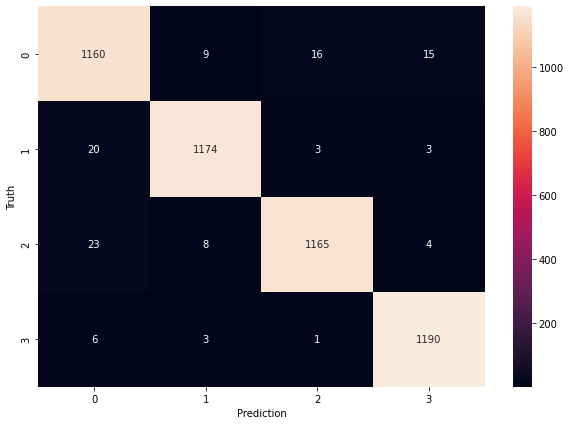

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')